In [18]:
using DifferentialEquations
using Plots
using ModelingToolkit

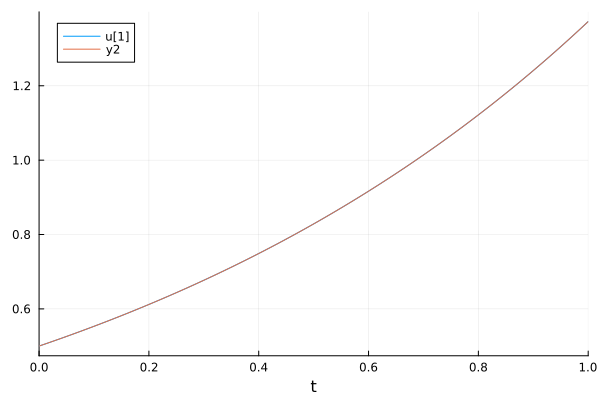

In [2]:
## 求解标量方程
# 定义问题
f(u,p,t) = 1.01 * u
u_0 = 1/2
t_span = (0.0 , 1.0)
prob = ODEProblem(f, u_0, t_span)
# 解决问题，使用solve函数
sol = solve(prob, BS3(),reltol = 1e-8)
plot(sol)
plot!(sol.t,t->0.5 * exp(1.01 * t))

In [3]:
sol[5]

sol.u[5][1]

0.5124539353502603

In [4]:
sol.t[8]

0.06807561538683116

In [5]:
## 求解方程组

# 定义一下 Lorenz 方程
function lorenz!(du,u,p,t)
    du[1] = 10.0 * (u[2] - u[1])
    du[2] = u[1] * (28.0 - u[3]) -u[2]
    du[3] = u[1] * u[2] - (8 / 3) * u[3]
end

u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
prob = ODEProblem(lorenz!, u0, tspan)
sol = solve(prob)

retcode: Success
Interpolation: 3rd order Hermite
t: 1292-element Vector{Float64}:
   0.0
   3.5678604836301404e-5
   0.0003924646531993154
   0.003262408731175873
   0.009058076622686189
   0.01695647090176743
   0.027689960116420883
   0.041856352219618344
   0.060240411865493296
   0.08368541210909924
   ⋮
  99.43545175575305
  99.50217600300971
  99.56297541572351
  99.62622492183432
  99.69561088424294
  99.77387244562912
  99.86354266863755
  99.93826978918452
 100.0
u: 1292-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799189e-8]
 [0.9961045497425811, 0.010965399721242457, 2.1469553658389193e-6]
 [0.9693591548287857, 0.0897706331002921, 0.00014380191884671585]
 [0.9242043547708632, 0.24228915014052968, 0.0010461625485930237]
 [0.8800455783133068, 0.43873649717821195, 0.003424260078582332]
 [0.8483309823046307, 0.6915629680633586, 0.008487625469885364]
 [0.8495036699348377, 1.0145426764822272, 0.01821209108471829]
 [0.91

In [6]:
[sol.u[1], sol.t[1]]

2-element Vector{Any}:
  [1.0, 0.0, 0.0]
 0.0

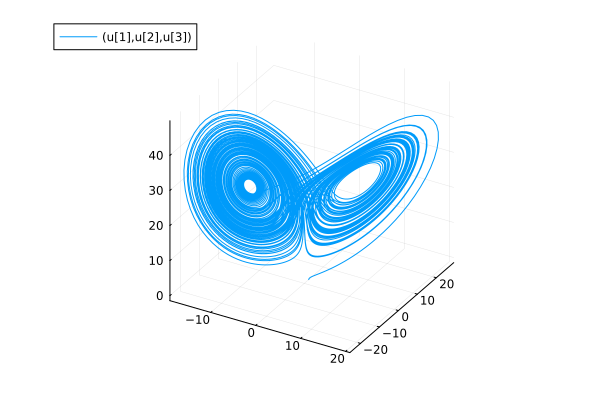

In [7]:
plot(sol, idxs = (1, 2, 3))

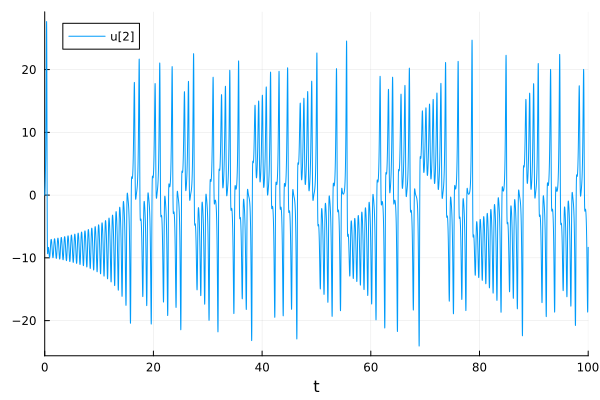

In [8]:
plot(sol, idxs = (0, 2))

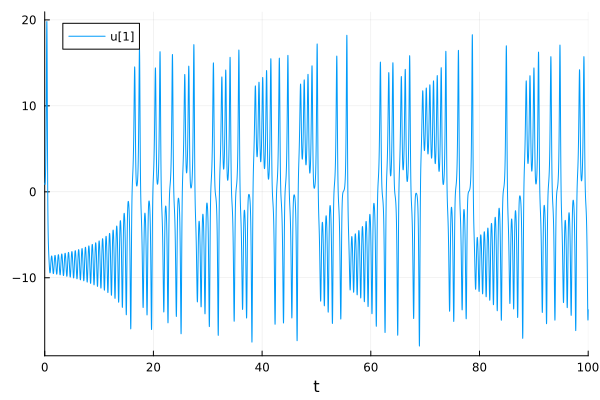

In [9]:
plot(sol, idxs = (0, 1))

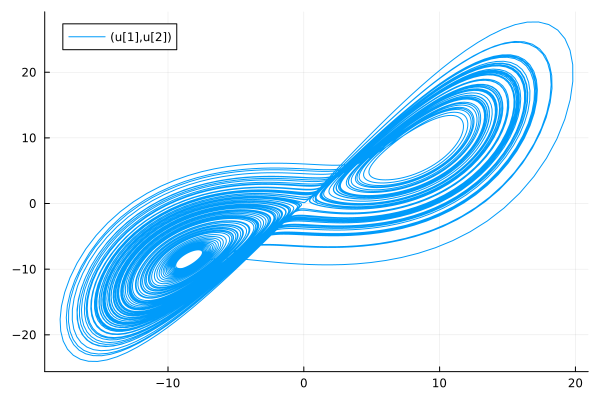

In [10]:
plot(sol, idxs = (1, 2))

In [11]:
sol[1]

3-element Vector{Float64}:
 1.0
 0.0
 0.0

In [12]:
sol.t[2]

3.5678604836301404e-5

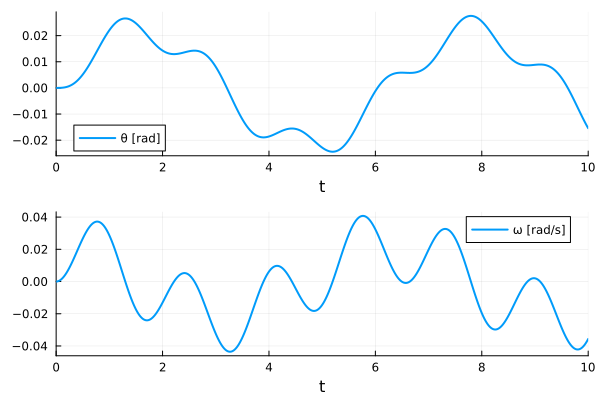

In [15]:
l = 1.0                             # length [m]
m = 1.0                             # mass [kg]
g = 9.81                            # gravitational acceleration [m/s²]

function pendulum!(du, u, p, t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -3g / (2l) * sin(u[1]) + 3 / (m * l^2) * p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

θ₀ = 0.0                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0, 10.0)                  # time interval

M = t -> 0.1sin(t)                    # external torque [Nm]

prob = ODEProblem(pendulum!, u₀, tspan, M)
sol = solve(prob)

plot(sol, linewidth = 2, xaxis = "t", label = ["θ [rad]" "ω [rad/s]"], layout = (2, 1))

In [ ]:
A = [1.0 0 0 -5
     4 -2 4 -3
     -4 0 0 1
     5 -2 2 3]
u0 = rand(4, 2)
tspan = (0.0, 1.0)
f(u, p, t) = A * u
prob = ODEProblem(f, u0, tspan)

ODEProblem with uType Matrix{Float64} and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 4×2 Matrix{Float64}:
 0.771155  0.296662
 0.73556   0.834426
 0.14752   0.000735874
 0.310002  0.524841

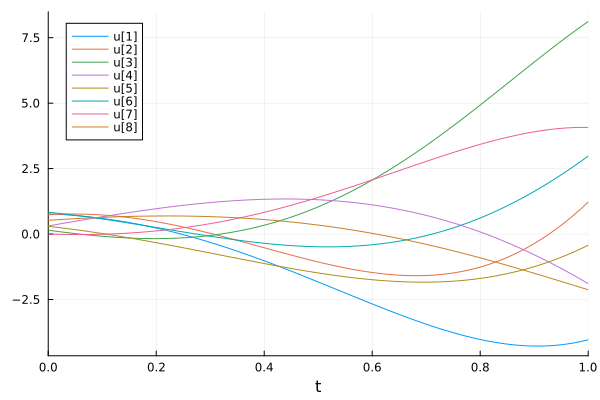

In [17]:
sol = solve(prob)
plot(sol)